# @GRIP : The Sparks Foundation


## Author : Ounadi Ikram

## Computer Vision and Internet of objects


## Task-2 : Color identification in images 



In [1]:
import cv2
import matplotlib.pyplot as plt
from colormap import rgb2hex
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib.pyplot import figure

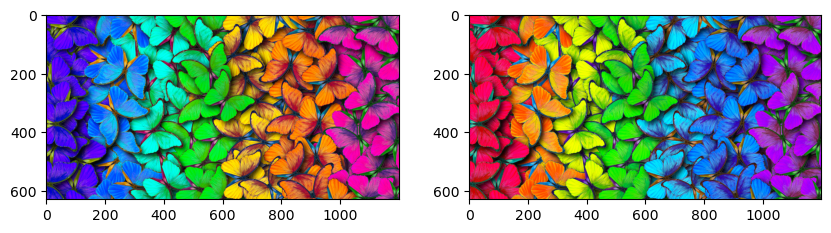

In [3]:
image2 = cv2.imread('color.jpeg')

image3 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
figure(figsize=(10, 20), dpi=100)

plt.subplot(2, 2, 1)
plt.imshow(image2)

plt.subplot(2, 2, 2)
plt.imshow(image3)

In [4]:
from sklearn.metrics import mean_squared_error
def rgb2hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm


In [5]:
import webcolors
webcolors.hex_to_name(u'#daa520')


'goldenrod'

In [6]:
from PIL import ImageColor

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb2hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    colors = [hex2name(ordered_colors[i]) for i in counts.keys()]

    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = colors, colors = hex_colors , startangle=90, autopct='%1.1f%%')
    
    return rgb_colors

'#343028' has no defined color name in css3
'#1696e7' has no defined color name in css3
'#c8e106' has no defined color name in css3
'#dc0e46' has no defined color name in css3
'#2cc417' has no defined color name in css3
'#a61be0' has no defined color name in css3
'#443f8e' has no defined color name in css3
'#e57916' has no defined color name in css3


[array([52.56160996, 48.20021782, 40.80246728]),
 array([ 22.99473315, 150.49930326, 231.70146669]),
 array([200.71918625, 225.51502651,   6.92500863]),
 array([220.73587118,  14.59499696,  70.17267785]),
 array([ 44.48424726, 196.22636566,  23.07032658]),
 array([166.1072885 ,  27.54624453, 224.03286127]),
 array([ 68.6183948 ,  63.12242665, 142.15746743]),
 array([229.99945019, 121.44144491,  22.24764955])]

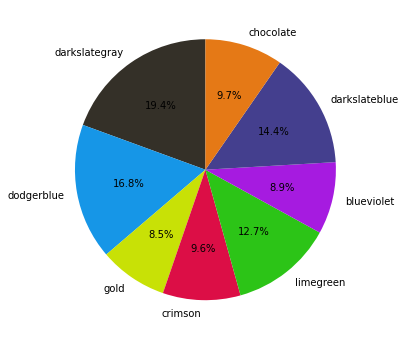

In [8]:
import numpy as np
get_colors(image3, 8, True)


In [ ]:
import cv2
import pandas as pd
import numpy as np

img = cv2.imread("colors.jpeg")
imgWidth = img.shape[1] - 40

index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv("colors.csv", header=None, names=index)


r = g = b = xpos = ypos = 0
def getRGBvalue(event, x, y, flags, param):
    global b, g, r, xpos, ypos, clicked
    xpos = x
    ypos = y
    b,g,r = img[y,x]
    b = int(b)
    g = int(g)
    r = int(r)
    
    
def colorname(B,G,R):
    minimum = 10000
    for i in range(len(df)):
        d = abs(B-int(df.loc[i,"B"])) + abs(G-int(df.loc[i,"G"])) + abs(R-int(df.loc[i,"R"]))
        if (d<=minimum):
            minimum = d
            cname = df.loc[i,"color_name"] 
    return cname

cv2.namedWindow("Image")
cv2.setMouseCallback("Image",getRGBvalue)
            
while True:
    cv2.imshow("Image", img)
    cv2.rectangle(img, (20,20), (imgWidth, 60),(b,g,r), -1)
    text = colorname(b,g,r) + '   R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
    cv2.putText(img,text, (50,50),2, 0.8, (255,255,255),2,cv2.LINE_AA)    
    if(r+g+b >= 600):
        cv2.putText(img,text,(50,50), 2, 0.8, (0,0,0),2,cv2.LINE_AA)   
    if cv2.waitKey(20) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()
